### Total capacity estimation using recursive FMAWTLS
This notebook implements the recursive FMAWTLS method using the same data set you are already familiar with from last week. Remember that the true capacity of this cell is 10.0 Ah.

Final FMAWTLS estimate (using all data): 10.058908 +/- 0.547957


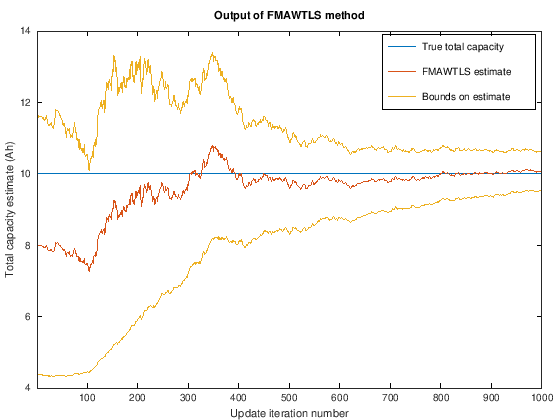

In [1]:
% Set up data for problem
load readonly/Lesson425data.mat

% FMAWTLS - recursive, scaled by initial standard deviations
K = sqrt(Sigmax(1)/Sigmay(1));    % Constant of proportionality
Qnom = 8;                        % Initialize nominal capacity
gamma = 0.999;                     % Fading-memory rate constant. Default = 1.00
SYinit = 1e-2;                    % Uncertainty of Q with respect to Qnom
c1 = 1/(K^2*SYinit);              % Correct initialization of c1 recursive value
c2 = K*Qnom/(K^2*SYinit);         % Correct initialization of c2 recursive value
c3 = K^2*Qnom^2/(K^2*SYinit);     % Correct initialization of c3 recursive value
% Init c4...c6 assuming SXinit = K^2*SYinit to match TLS
c4 = 1/(K^2*SYinit);              % Correct initialization of c4 recursive value
c5 = K*Qnom/(K^2*SYinit);         % Correct initialization of c5 recursive value
c6 = K^2*Qnom^2/(K^2*SYinit);     % Correct initialization of c6 recursive value

Qhat = 0*x;                       % Initialize storage for output 
SigmaQ = 0*x;
for k = 1:length(x),
  c1 = gamma*c1 + x(k)^2/(K^2*Sigmay(k));
  c2 = gamma*c2 + K*x(k)*y(k)/(K^2*Sigmay(k));
  c3 = gamma*c3 + K^2*y(k)^2/(K^2*Sigmay(k));
  c4 = gamma*c4 + x(k)^2/Sigmax(k);
  c5 = gamma*c5 + K*x(k)*y(k)/Sigmax(k);
  c6 = gamma*c6 + K^2*y(k)^2/Sigmax(k);
  
  r = roots([c5 (-c1+2*c4-c6) (3*c2-3*c5) (c1-2*c3+c6) -c2]);
  r = r(r==conj(r));
  r = r(r>0);
  Jr = ((1./(r.^2+1).^2).*(r.^4*c4-2*c5*r.^3+(c1+c6)*r.^2-2*c2*r+c3))';
  Q = r(Jr==min(Jr));
  J = min(Jr);
  H = (2/(Q^2+1)^4)*(-2*c5*Q^5+(3*c1-6*c4+3*c6)*Q^4+(-12*c2+16*c5)*Q^3 ...
        +(-8*c1+10*c3+6*c4-8*c6)*Q^2+(12*c2-6*c5)*Q+(c1-2*c3+c6));
  Qhat(k) = Q/K;
  SigmaQ(k) = 2/H/K^2;
end

xvals = 1:length(Qhat);
plot(xvals,10*ones(size(Qhat)),xvals,Qhat,[xvals,NaN,xvals],[Qhat+3*sqrt(SigmaQ),NaN,Qhat-3*sqrt(SigmaQ)]);
xlabel('Update iteration number'); ylabel('Total capacity estimate (Ah)');
title('Output of FMAWTLS method');   xlim([1 1000]);
legend('True total capacity','FMAWTLS estimate','Bounds on estimate','location','northeast');

fprintf('Final FMAWTLS estimate (using all data): %f +/- %f\n',Qhat(end),3*sqrt(SigmaQ(end)));